### Multi-dimensional data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y**2 

In [14]:
# x, y, z
x = np.linspace(0,10, 20)
y = np.linspace(0,10,20)
X, Y = np.meshgrid(x, y) # 2D grid out of 1D arrays

In [15]:
X

array([[ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  

In [16]:
Z = fm((X,Y))
x = X.flatten() # 2D to 1D
y = Y.flatten()

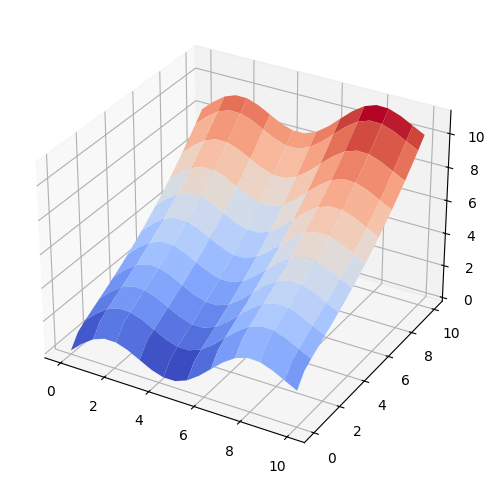

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection="3d")
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap="coolwarm", linewidth=0.5, antialiased=True)

In [19]:
mat = np.zeros((len(x), 6+1))
mat[:,6] = np.sqrt(y)
mat[:,5] = np.sin(x)
mat[:, 4] = y ** 2
mat[:, 3] = x ** 2
mat[:, 2] = y
mat[:, 1] = x
mat[:, 0] = 1

In [20]:
reg = np.linalg.lstsq(mat, fm((x, y)), rcond=None)[0]

In [21]:
RZ = np.dot(mat, reg).reshape((20,20)) # Transforms reg to the grid structure

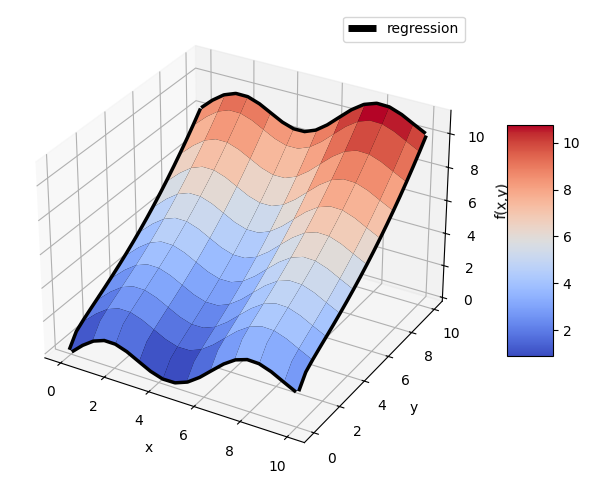

In [23]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection="3d")
surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap="coolwarm", linewidth=0.5)
wire = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, color="black", linewidth=5, label="regression")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)